In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
from matplotlib import rcParams
rcParams['figure.figsize']= 10,10


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
df= pd.read_csv('/content/drive/My Drive/Iris.csv')

print(df.dtypes)
df

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
print(df.isnull())
print(df.isnull().sum())

        Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0    False          False         False          False         False    False
1    False          False         False          False         False    False
2    False          False         False          False         False    False
3    False          False         False          False         False    False
4    False          False         False          False         False    False
..     ...            ...           ...            ...           ...      ...
145  False          False         False          False         False    False
146  False          False         False          False         False    False
147  False          False         False          False         False    False
148  False          False         False          False         False    False
149  False          False         False          False         False    False

[150 rows x 6 columns]
Id               0
SepalLengthCm    0
Se

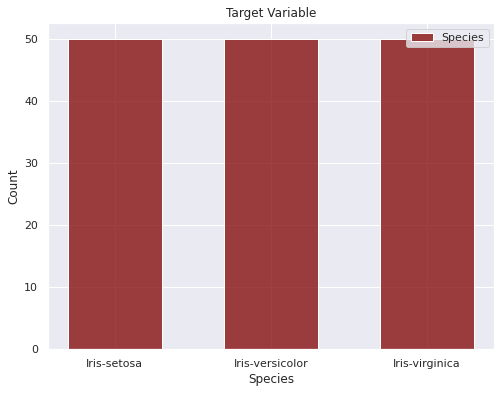

In [ ]:
import seaborn as sns
sns.set(style='darkgrid', palette="deep", font_scale=1.0, rc={"figure.figsize": [8, 6]})
sns.histplot(data = df, x="Species", color="maroon", label="Species", shrink=0.6)
plt.title("Target Variable")
plt.legend() 
plt.show()

<Figure size 2880x720 with 0 Axes>

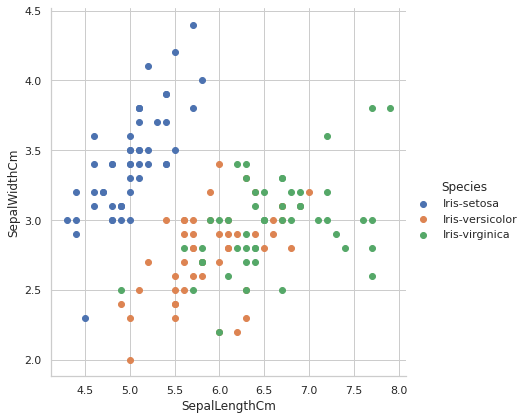

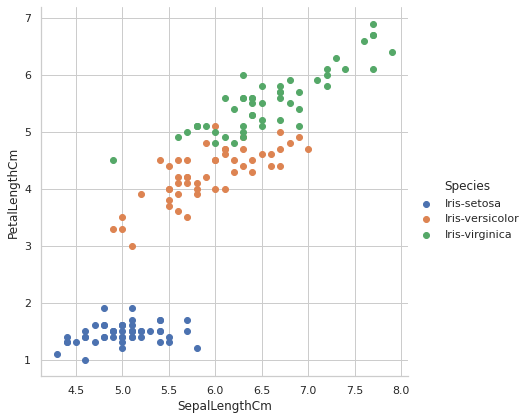

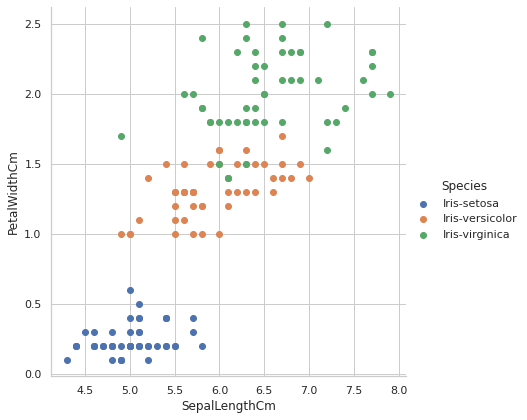

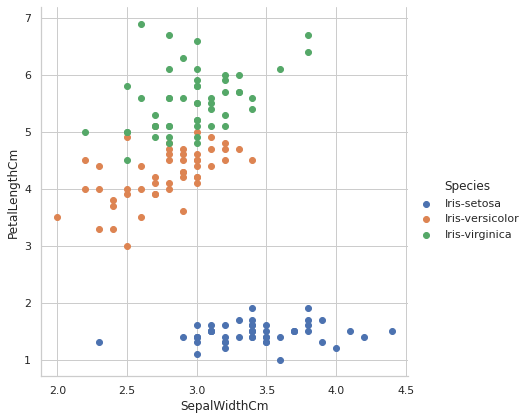

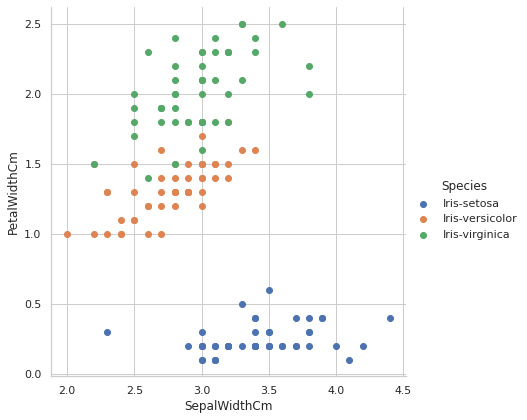

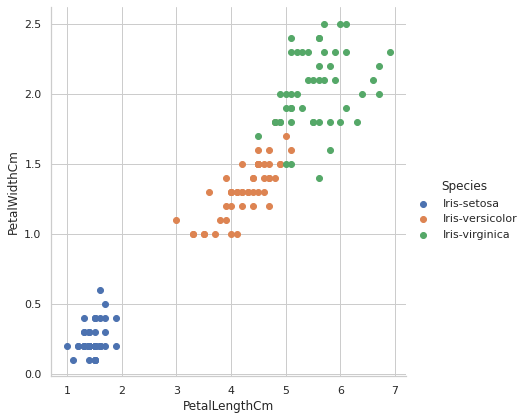

In [ ]:
features = ['SepalLengthCm', 'SepalWidthCm',	'PetalLengthCm', 'PetalWidthCm']
fig, ax = plt.subplots(1, 0, figsize=(len(features)*10, 10))
for i in range(len(features)):
  for j in range(i+1,len(features)):
    sns.set_style("whitegrid")
    sns.FacetGrid(df, hue ="Species", height = 6).map(plt.scatter, features[i], features[j]).add_legend()
    plt.show()

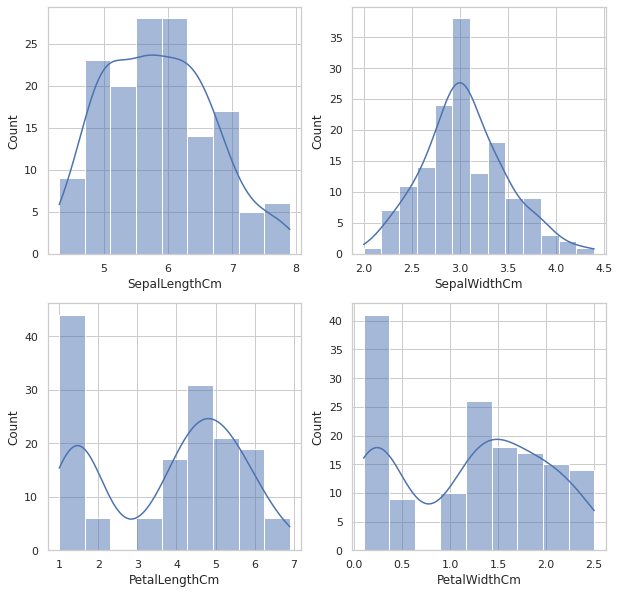

In [ ]:
columns = ['SepalLengthCm', 	'SepalWidthCm',	'PetalLengthCm', 'PetalWidthCm']
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for x, y in zip(columns, ax.flatten()):
    sns.histplot(df[x], ax=y, kde=True)

In [ ]:
df = df.sample(frac=1)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
12,13,4.8,3.0,1.4,0.1,Iris-setosa
139,140,6.9,3.1,5.4,2.1,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
5,6,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...,...
66,67,5.6,3.0,4.5,1.5,Iris-versicolor
25,26,5.0,3.0,1.6,0.2,Iris-setosa
48,49,5.3,3.7,1.5,0.2,Iris-setosa
123,124,6.3,2.7,4.9,1.8,Iris-virginica


                     Id  SepalLengthCm  ...  PetalLengthCm  PetalWidthCm
Id             1.000000       0.716676  ...       0.882747      0.899759
SepalLengthCm  0.716676       1.000000  ...       0.871754      0.817954
SepalWidthCm  -0.397729      -0.109369  ...      -0.420516     -0.356544
PetalLengthCm  0.882747       0.871754  ...       1.000000      0.962757
PetalWidthCm   0.899759       0.817954  ...       0.962757      1.000000

[5 rows x 5 columns]


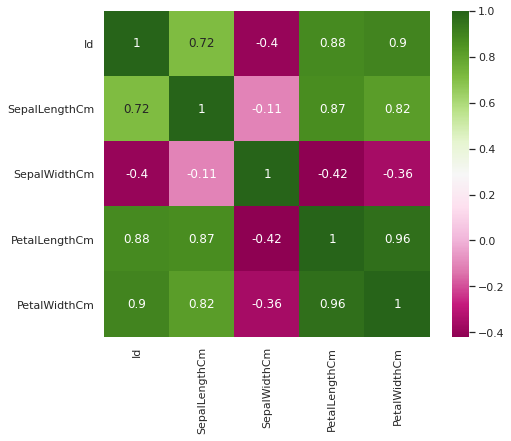

In [ ]:
plt.rcParams['figure.figsize'] = [8,6]
corrMatrix = df.corr()
print (corrMatrix)
sns.heatmap(corrMatrix, annot=True, cmap='PiYG',square=True)
plt.show()

In [ ]:
X = df.drop(['Species','Id'], axis=1)
# X = df.drop(['Id'], axis=1)
Y = df['Species']
Y.to_numpy()
print(X)
print(Y)
print(Y.dtype)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
93             5.0           2.3            3.3           1.0
12             4.8           3.0            1.4           0.1
139            6.9           3.1            5.4           2.1
148            6.2           3.4            5.4           2.3
5              5.4           3.9            1.7           0.4
..             ...           ...            ...           ...
66             5.6           3.0            4.5           1.5
25             5.0           3.0            1.6           0.2
48             5.3           3.7            1.5           0.2
123            6.3           2.7            4.9           1.8
41             4.5           2.3            1.3           0.3

[150 rows x 4 columns]
93     Iris-versicolor
12         Iris-setosa
139     Iris-virginica
148     Iris-virginica
5          Iris-setosa
            ...       
66     Iris-versicolor
25         Iris-setosa
48         Iris-setosa
123     Iris-virginica
41

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
Z=X
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# print(X)

scaler = StandardScaler().fit_transform(X)
print("Standardized dataset \n",scaler)
# print(X)

Standardized dataset 
 [[-1.0218e+00 -1.7448e+00 -2.6082e-01 -2.6119e-01]
 [-1.2642e+00 -1.2496e-01 -1.3413e+00 -1.4444e+00]
 [ 1.2803e+00  1.0645e-01  9.3336e-01  1.1850e+00]
 [ 4.3217e-01  8.0065e-01  9.3336e-01  1.4480e+00]
 [-5.3718e-01  1.9577e+00 -1.1707e+00 -1.0500e+00]
 [ 6.7450e-01 -5.8776e-01  1.0471e+00  1.3165e+00]
 [-7.7951e-01  8.0065e-01 -1.3413e+00 -1.3130e+00]
 [ 1.5227e+00 -1.2496e-01  1.2177e+00  1.1850e+00]
 [ 2.4920e+00  1.7263e+00  1.5020e+00  1.0535e+00]
 [-9.0068e-01  5.6925e-01 -1.1707e+00 -9.1856e-01]
 [-1.2642e+00 -1.2496e-01 -1.3413e+00 -1.1815e+00]
 [-5.2506e-02  2.1891e+00 -1.4550e+00 -1.3130e+00]
 [-1.7489e+00 -3.5636e-01 -1.3413e+00 -1.3130e+00]
 [-9.0068e-01  8.0065e-01 -1.2844e+00 -1.3130e+00]
 [ 1.1592e+00 -5.8776e-01  5.9216e-01  2.6470e-01]
 [ 5.5333e-01  5.6925e-01  1.2745e+00  1.7109e+00]
 [ 6.7450e-01  3.3785e-01  4.2156e-01  3.9617e-01]
 [-1.1430e+00 -1.5134e+00 -2.6082e-01 -2.6119e-01]
 [-1.5065e+00  1.2635e+00 -1.5687e+00 -1.3130e+00]
 [-1.143

Covariance matrix 
[[ 1.0067 -0.1101  0.8776  0.8234]
 [-0.1101  1.0067 -0.4233 -0.3589]
 [ 0.8776 -0.4233  1.0067  0.9692]
 [ 0.8234 -0.3589  0.9692  1.0067]]


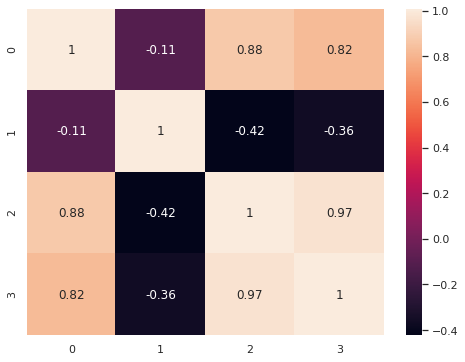

In [ ]:
meanVector = np.mean(scaler, axis=0)
cov_mat = (scaler - meanVector).T.dot((scaler - meanVector)) / (scaler.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)
sns.heatmap(cov_mat,annot=True)

NumPy covariance matrix: 
[[ 1.0067 -0.1101  0.8776  0.8234]
 [-0.1101  1.0067 -0.4233 -0.3589]
 [ 0.8776 -0.4233  1.0067  0.9692]
 [ 0.8234 -0.3589  0.9692  1.0067]]


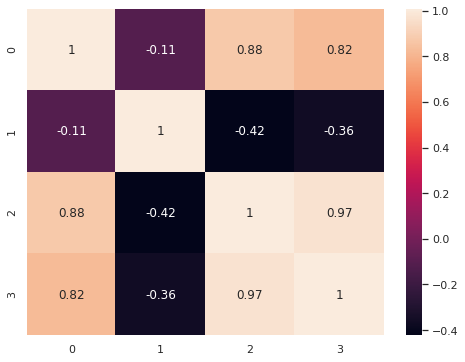

In [ ]:
np_covMat = np.cov(scaler.T)
print('NumPy covariance matrix: \n%s' %np_covMat)
sns.heatmap(np_covMat,annot=True)

In [ ]:
from numpy import linalg as LA
eig_vals, eig_vecs = LA.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.5224 -0.3723 -0.721   0.262 ]
 [-0.2634 -0.9256  0.242  -0.1241]
 [ 0.5813 -0.0211  0.1409 -0.8012]
 [ 0.5656 -0.0654  0.6338  0.5235]]

Eigenvalues 
[2.9304 0.9274 0.1483 0.0207]


In [ ]:
cor_mat1 = np.corrcoef(scaler.T)

eig_vals, eig_vecs = LA.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.5224 -0.3723 -0.721   0.262 ]
 [-0.2634 -0.9256  0.242  -0.1241]
 [ 0.5813 -0.0211  0.1409 -0.8012]
 [ 0.5656 -0.0654  0.6338  0.5235]]

Eigenvalues 
[2.9108 0.9212 0.1474 0.0206]


In [ ]:
cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = LA.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs[:5])
print('\nEigenvalues \n%s' %eig_vals[:5])

Eigenvectors 
[[ 0.5224 -0.3723 -0.721   0.262 ]
 [-0.2634 -0.9256  0.242  -0.1241]
 [ 0.5813 -0.0211  0.1409 -0.8012]
 [ 0.5656 -0.0654  0.6338  0.5235]]

Eigenvalues 
[2.9108 0.9212 0.1474 0.0206]


We can clearly see that all three approaches yield the same eigenvectors and eigenvalue pairs:

-Eigendecomposition of the covariance matrix
after standardizing the data.

-Eigendecomposition of the correlation matrix.

-Eigendecomposition of the correlation matrix after standardizing the data.

Explained variance:  [72.77045209380132, 23.030523267680618, 3.6838319576274063, 0.515192680890641]
Cumulative explained variance:  [ 72.7705  95.801   99.4848 100.    ]
Sum of all individual variances:  99.99999999999999


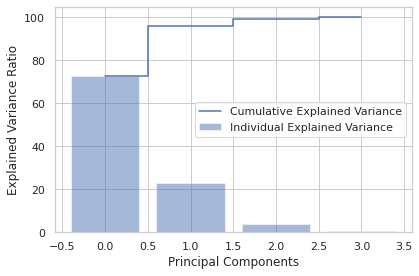

In [ ]:
explained_variances = []
for i in range(len(eig_vals)):
    explained_variances.append(eig_vals[i] / np.sum(eig_vals)*100)
cum_explained_variances = np.cumsum(explained_variances)
 
print("Explained variance: " ,explained_variances)
print("Cumulative explained variance: ",cum_explained_variances)
print("Sum of all individual variances: ",np.sum(explained_variances))
plt.figure(figsize=(6, 4))
plt.bar(range(4), explained_variances, alpha=0.5, align='center',label='Individual Explained Variance')
plt.step(range(4), cum_explained_variances, where='mid',label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()


# plt.figure(figsize=(6, 4))

#     plt.bar(range(4), var_exp, alpha=0.5, align='center',
#             label='individual explained variance')
#     plt.step(range(4), cum_var_exp, where='mid',
#              label='cumulative explained variance')
#     plt.ylabel('Explained variance ratio')
#     plt.xlabel('Principal components')
#     plt.legend(loc='best')
#     plt.tight_layout()

The first value is just the sum of explained variances — and must be equal to 1. The second value is an array, representing the explained variance percentage per principal component.
The first two principal components account for around 96% of the variance in the data. 

In [ ]:
projected_1 = scaler.dot(eig_vecs.T[0])
projected_2 = scaler.dot(eig_vecs.T[1])
#preparing a dataframe of the same
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = Y
res

,PC1,PC2,Y
0,-0.373628,2.017932,Iris-setosa
1,-2.224083,0.709118,Iris-setosa
2,1.853552,-0.672423,Iris-setosa
3,1.376391,-1.016362,Iris-setosa
4,-2.070537,-1.518549,Iris-setosa
...,...,...,...
145,0.348006,0.190622,Iris-virginica
146,-1.957024,0.607893,Iris-virginica
147,-2.226781,-1.025483,Iris-virginica
148,1.329194,0.486761,Iris-virginica


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


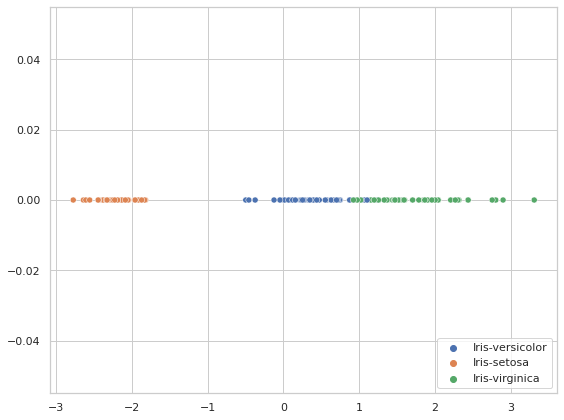

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(projected_1, 0*len(Y), hue=df['Species'])
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


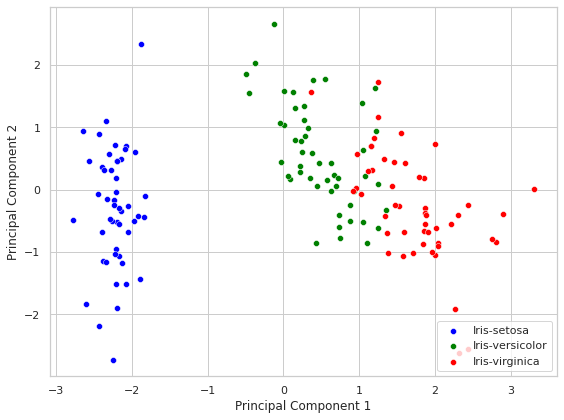

In [ ]:
plt.figure(figsize=(8, 6))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                    ('blue', 'green', 'red')):
    sns.scatterplot(projected_1[Y==lab], projected_2[Y==lab],label=lab, color=col)
# sns.scatterplot(projected_1, projected_2, hue=df['Species'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

using sklearn library

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.9)
# print(X)
pca_sk = pca.fit_transform(scaler)
print("Total no of components required: ",pca.n_components_)
print(pca)

Total no of components required:  2
PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


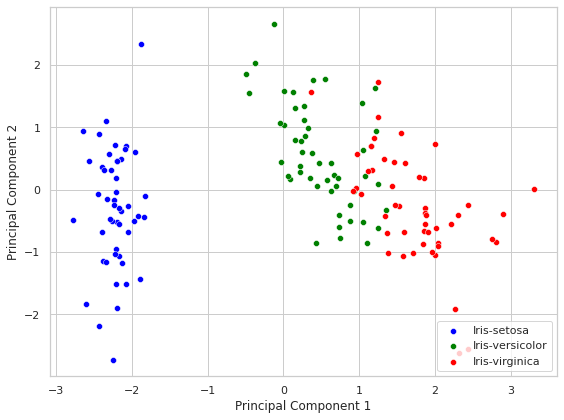

In [ ]:
plt.figure(figsize=(8, 6))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                    ('blue', 'green', 'red')):
    # plt.scatter(pca_sk[Y==lab, 0],
    #             pca_sk[Y==lab, 1]*-1,
    #             label=lab,
    #             c=col)
    sns.scatterplot(pca_sk[Y==lab, 0], pca_sk[Y==lab, 1]*-1,label=lab, color=col)
# sns.scatterplot(pca_sk, pca_sk[Y==lab, 1]*-1)
plt.xlabel('Principal Component 1')
# sns.scatterplot(hue=df['Species'])
# sns.scatterplot(pca_sk[Y==lab, 0], pca_sk[Y==lab, 1]*-1, hue=Y)
# scatter.legend()
plt.ylabel('Principal Component 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

From scatch

In [ ]:
total = sum(eig_vals)
var_exp = [(i / total)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance:", cum_var_exp)
print("Individual Variances:", var_exp)

Cumulative Variance: [ 72.7705  95.801   99.4848 100.    ]
Individual Variances: [72.77045209380132, 23.030523267680618, 3.6838319576274063, 0.515192680890641]


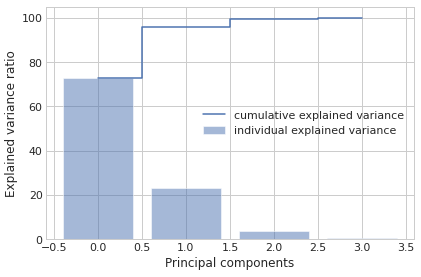

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
#for pc1 and pc2 we take only starting 2 rows of eigen vector
matrix_w = eig_vecs[:, 0:2]
print('W:\n', matrix_w)
Y1 = X.dot(matrix_w)
Y1 = Y1.to_numpy()

W:
 [[ 0.5224 -0.3723]
 [-0.2634 -0.9256]
 [ 0.5813 -0.0211]
 [ 0.5656 -0.0654]]


In [ ]:
print(Y)

93     Iris-versicolor
12         Iris-setosa
139     Iris-virginica
148     Iris-virginica
5          Iris-setosa
            ...       
66     Iris-versicolor
25         Iris-setosa
48         Iris-setosa
123     Iris-virginica
41         Iris-setosa
Name: Species, Length: 150, dtype: object


In [ ]:
proj_1 = Y1[:, 0]
proj_2 = Y1[:, 1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


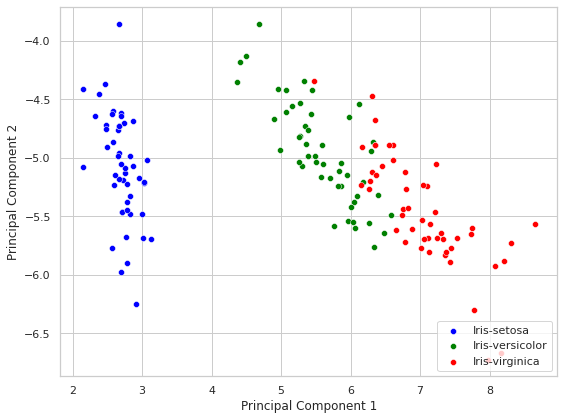

In [ ]:
plt.figure(figsize=(8, 6))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                    ('blue', 'green', 'red')):
    # sns.scatterplot(Y1[Y==lab, 0],
    #             Y1[Y==lab, 1], #flip the figure
    #             label=lab, color=col)
    sns.scatterplot(Y1[Y==lab, 0], Y1[Y==lab, 1],label=lab, color=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()



**Reference**

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

http://www.physics.utah.edu/~detar/lessons/python/numpy_eigen/node1.html

https://pub.towardsai.net/principal-component-analysis-pca-with-python-examples-tutorial-67a917bae9aa

https://www.kaggle.com/shrutimechlearn/step-by-step-pca-with-iris-dataset

https://plotly.com/python/pca-visualization/

https://towardsdatascience.com/principal-component-analysis-pca-from-scratch-in-python-7f3e2a540c51

https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html


**Question 2**

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
label_encoder = enc.fit(Y)
Z = label_encoder.transform(Y) + 1
# X = df.drop(['Species','Id'], axis=1)
# # X = df.drop(['Id'], axis=1)
# Y = df['Species']
# # Y.to_numpy()
# print(X)
X=X.to_numpy()
# print(Y)
# print(Y.dtype)

In [ ]:
np.set_printoptions(precision=4)
# print(Y)
# print(Z)
mean_vectors = []
for i in range(1,4):
    mean_vectors.append(np.mean(X[Z==i], axis=0))
    print('Mean Vector class %s:' %(i))
    print(mean_vectors[i-1],"\n")
    # mean_vectors = []
# mean_vectors=np.array(mean_vectors)
# print(mean_vectors)

Mean Vector class 1:
[5.006 3.418 1.464 0.244] 

Mean Vector class 2:
[5.936 2.77  4.26  1.326] 

Mean Vector class 3:
[6.588 2.974 5.552 2.026] 



In [ ]:
S_W = np.zeros((4,4))
for i,j in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((4,4))                  # scatter matrix for every class
    for k in X[Z == i]:
        k, j = k.reshape(4,1), j.reshape(4,1) # make column vectors
        class_sc_mat = class_sc_mat + (k-j).dot((k-j).T)
    S_W = S_W + class_sc_mat                             # sum class scatter matrices
print('Scatter Matrix within-class :\n', S_W)

# S_W = np.zeros((4,4))
# for clas,mv in zip(range(4), mean_vectors):
#     class_sc_mat = np.zeros((4,4))                  # scatter matrix for every class
#     for row in X[Y == y_att[clas]]:
#         row = row.reshape(4,1)
#         mv = mv.reshape(4,1) # make column vectors
#         class_sc_mat = class_sc_mat + (row-mv).dot((row-mv).T)
#     S_W = S_W + class_sc_mat                             # sum class scatter matrices
# print('Within-Class Scatter Matrix:\n', S_W)

Scatter Matrix within-class :
 [[38.9562 13.683  24.614   5.6556]
 [13.683  17.035   8.12    4.9132]
 [24.614   8.12   27.22    6.2536]
 [ 5.6556  4.9132  6.2536  6.1756]]


In [ ]:
overall_mean = np.mean(X, axis=0)
S_B = np.zeros((4,4))
for i,j in enumerate(mean_vectors):  
    n = X[Z==i+1,:].shape[0]
    j = j.reshape(4,1) # make column vector
    overall_mean = overall_mean.reshape(4,1) # make column vector
    S_B += n * (j - overall_mean).dot((j - overall_mean).T)

print('Scatter Matrix between-class :\n', S_B)

Scatter Matrix between-class :
 [[ 63.2121 -19.534  165.1647  71.3631]
 [-19.534   10.9776 -56.0552 -22.4924]
 [165.1647 -56.0552 436.6437 186.9081]
 [ 71.3631 -22.4924 186.9081  80.6041]]


In [ ]:
eig_value, eig_vector = LA.eig(LA.inv(S_W).dot(S_B))

for i in range(len(eig_value)):
    eigvec_sc = eig_vector[:,i].reshape(4,1)   
    # print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print("Eigenvector",i+1,":")
    print(eigvec_sc.real)
    print("Eigenvalue",i+1,":", eig_value[i].real)
    print()

    # print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))

Eigenvector 1 :
[[-0.2049]
 [-0.3871]
 [ 0.5465]
 [ 0.7138]]
Eigenvalue 1 : 32.27195779972985

Eigenvector 2 :
[[-0.009 ]
 [-0.589 ]
 [ 0.2543]
 [-0.767 ]]
Eigenvalue 2 : 0.27756686384004553

Eigenvector 3 :
[[ 0.8742]
 [-0.2383]
 [-0.2023]
 [-0.3715]]
Eigenvalue 3 : -1.6595636537517215e-15

Eigenvector 4 :
[[-0.7414]
 [ 0.4298]
 [ 0.4461]
 [-0.2581]]
Eigenvalue 4 : -3.90836096547534e-15



In [ ]:
for i in range(len(eig_value)):
    eigv = eig_vector[:,i].reshape(4,1)
    np.testing.assert_array_almost_equal(LA.inv(S_W).dot(S_B).dot(eigv),eig_value[i] * eigv,decimal=6, err_msg='', verbose=True)

In [ ]:
eigen_pairs = [(np.abs(eig_value[i]), eig_vector[:,i]) for i in range(len(eig_vals))]

# Sorting
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in decreasing order:\n')
for i in eigen_pairs:
    print(i[0])

Eigenvalues in decreasing order:

32.27195779972985
0.27756686384004553
3.90836096547534e-15
1.6595636537517215e-15


In [ ]:
print('Variance explained:')
explained_var=[]
eigv_sum = sum(eig_value)
for i,j in enumerate(eigen_pairs):
  explained_var.append(((j[0]/eigv_sum).real)*100)
print(explained_var)

Variance explained:
[99.1472475659508, 0.8527524340492266, 1.2007428697874843e-14, 5.098580304643098e-15]


In [ ]:
W = np.hstack((eigen_pairs[0][1].reshape(4,1), eigen_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[-0.2049 -0.009 ]
 [-0.3871 -0.589 ]
 [ 0.5465  0.2543]
 [ 0.7138 -0.767 ]]


In [ ]:
X_lda = X.dot(W)
assert X_lda.shape == (150,2), "The matrix is not 150x2 dimensional."

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


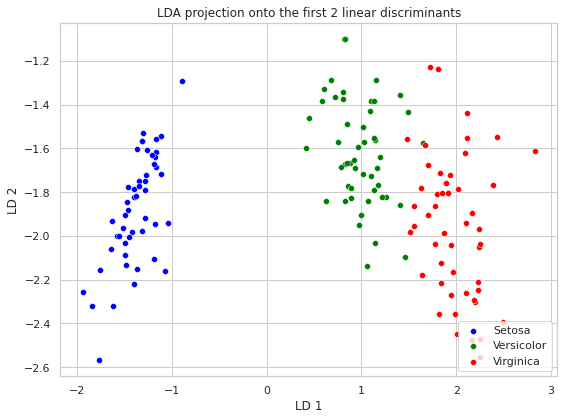

In [ ]:
label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}
plt.figure(figsize=(8, 6))
for lab, col in zip(range(1,4),('blue', 'green', 'red')):

    sns.scatterplot(X_lda[:,0].real[Z == lab], X_lda[:,1].real[Z == lab],label=label_dict[lab], color=col)
# sns.scatterplot(pca_sk, pca_sk[Y==lab, 1]*-1)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.title('LDA projection onto the first 2 linear discriminants')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X, Y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


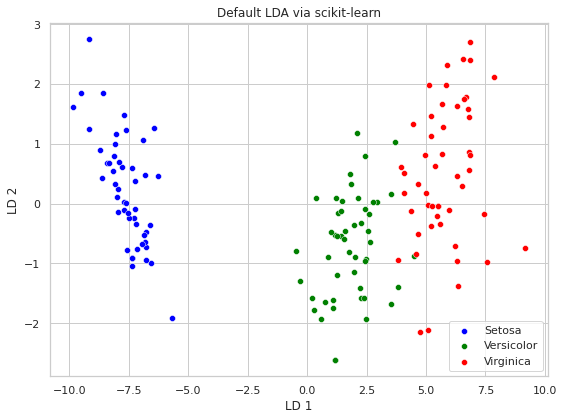

In [ ]:
plt.figure(figsize=(8, 6))
for lab, col in zip(range(1,4),('blue', 'green', 'red')):
  sns.scatterplot(X_lda_sklearn[:,0][Z == lab]*-1, X_lda_sklearn[:,1][Z == lab]*-1,label=label_dict[lab], color=col)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.title('Default LDA via scikit-learn')
plt.legend(loc='lower right')
# plt.title('LDA projection onto the first 2 linear discriminants')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_lda_sklearn,Y, test_size=0.2)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(pca_sk,Y, test_size=0.2)

In [ ]:
gnb1 = GaussianNB()
gnb1.fit(X_train,Y_train)
gnb2 = GaussianNB()
gnb2.fit(X_train1, Y_train1)
gnb3 = GaussianNB()
gnb3.fit(X_train2, Y_train2)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy before applying LDA and PCA: ", accuracy_score(Y_test,gnb1.predict(X_test)))
print("Accuracy after applying LDA: ", accuracy_score(Y_test1,gnb2.predict(X_test1)))
print("Accuracy after applying PCA: ", accuracy_score(Y_test2,gnb3.predict(X_test2)))

Accuracy before applying LDA and PCA:  0.9666666666666667
Accuracy after applying LDA:  0.9666666666666667
Accuracy after applying PCA:  0.8666666666666667


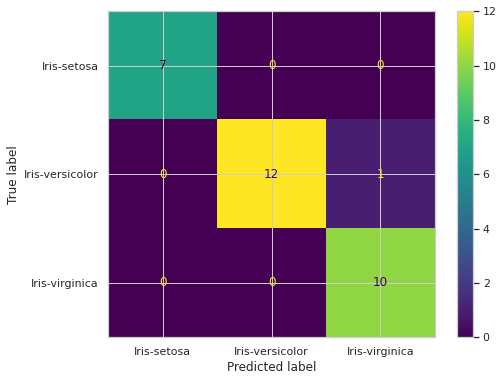

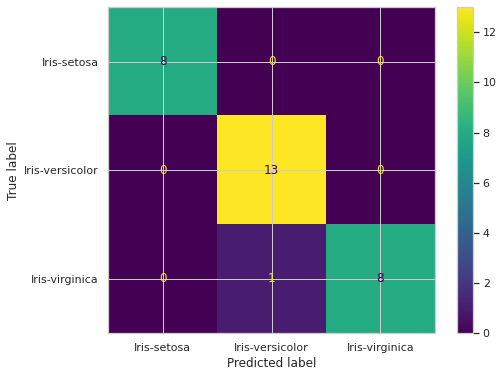

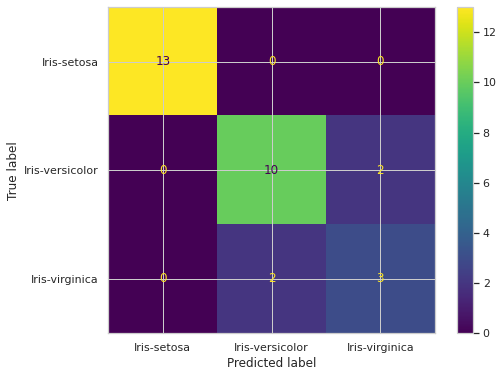

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb1,X_test, Y_test)
plot_confusion_matrix(gnb2,X_test1, Y_test1)
plot_confusion_matrix(gnb3,X_test2, Y_test2)

**Reference**

https://sebastianraschka.com/Articles/2014_python_lda.html

https://www.section.io/engineering-education/linear-discriminant-analysis/#:~:text=Linear%20Discriminant%20Analysis(LDA)%20is,Let's%20get%20started.

https://towardsdatascience.com/linear-discriminant-analysis-in-python-76b8b17817c2#:~:text=Linear%20Discriminant%20Analysis%20(LDA)%20is,as%20much%20information%20as%20possible



**Question 3**

In [756]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
df1= pd.read_csv('/content/drive/My Drive/diabetes.csv')

print(df1.dtypes)
print(df1.shape)
print(df1)


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
(768, 9)
     Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]


In [757]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [758]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [759]:
print(df1.isnull())
print(df1.isnull().sum())

     Pregnancies  Glucose  ...    Age  Outcome
0          False    False  ...  False    False
1          False    False  ...  False    False
2          False    False  ...  False    False
3          False    False  ...  False    False
4          False    False  ...  False    False
..           ...      ...  ...    ...      ...
763        False    False  ...  False    False
764        False    False  ...  False    False
765        False    False  ...  False    False
766        False    False  ...  False    False
767        False    False  ...  False    False

[768 rows x 9 columns]
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


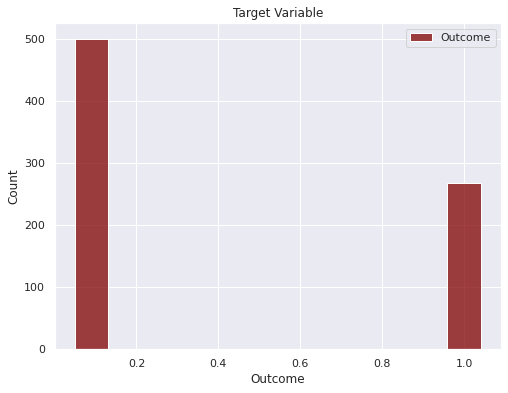

In [760]:
import seaborn as sns
sns.set(style='darkgrid', palette="deep", font_scale=1.0, rc={"figure.figsize": [8, 6]})
sns.histplot(data = df1, x="Outcome", color="maroon", label="Outcome", shrink=0.9)
plt.title("Target Variable")
plt.legend() 
plt.show()

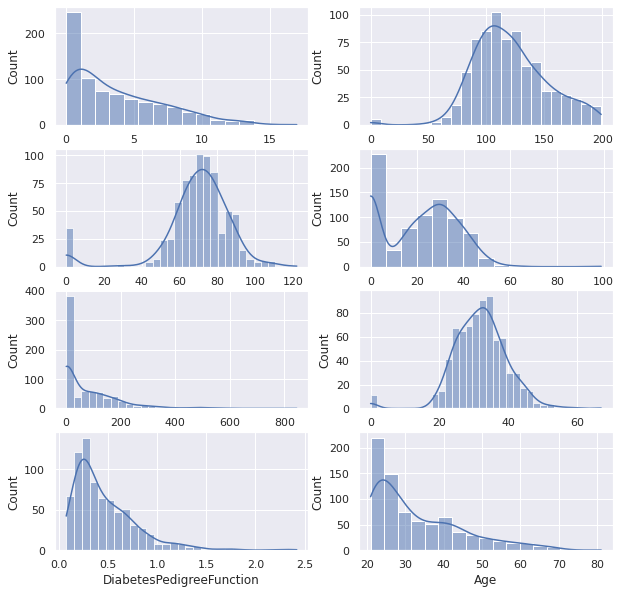

In [761]:
columns = ['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']
fig, ax = plt.subplots(4, 2, figsize=(10, 10))
for x, y in zip(columns, ax.flatten()):
    sns.histplot(df1[x], ax=y, kde=True)

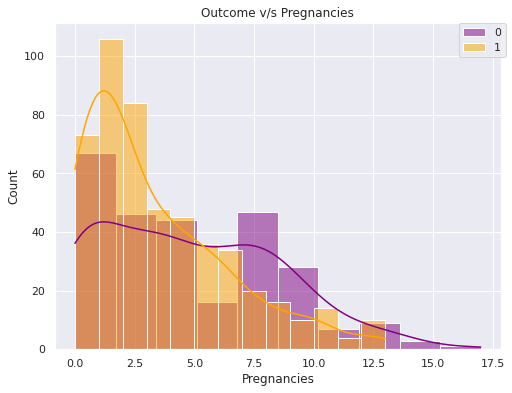

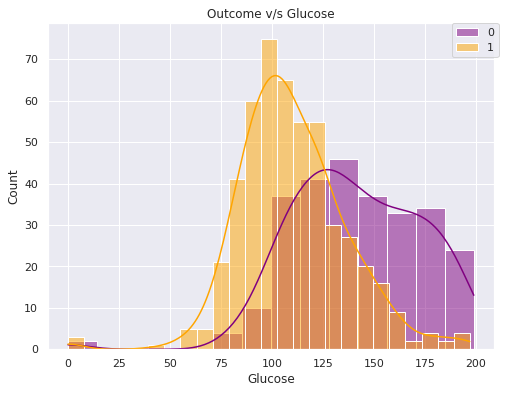

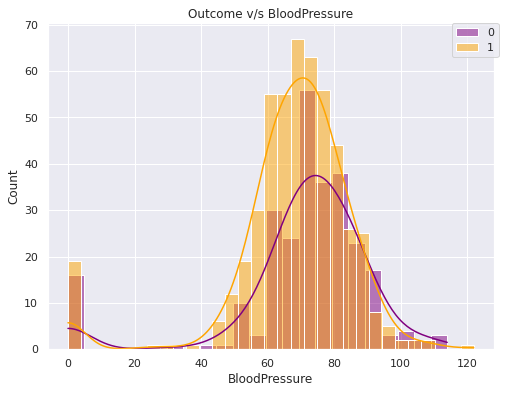

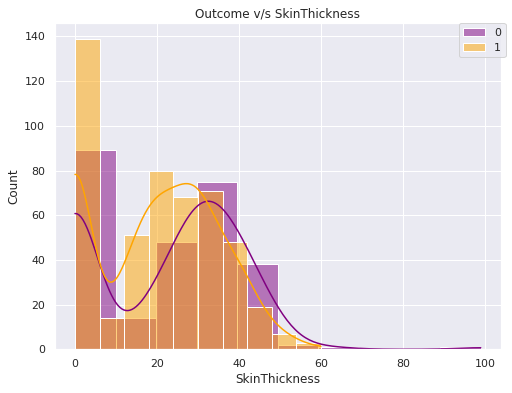

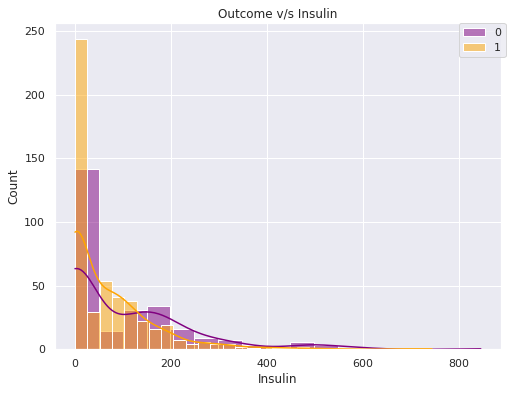

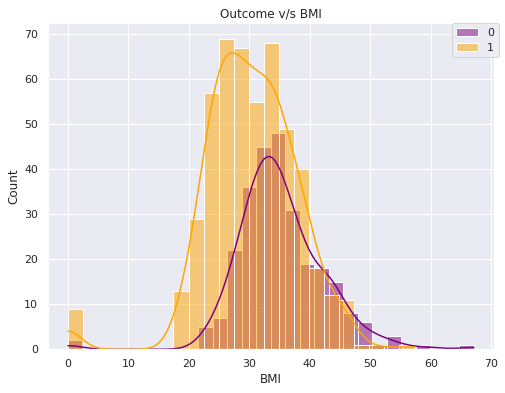

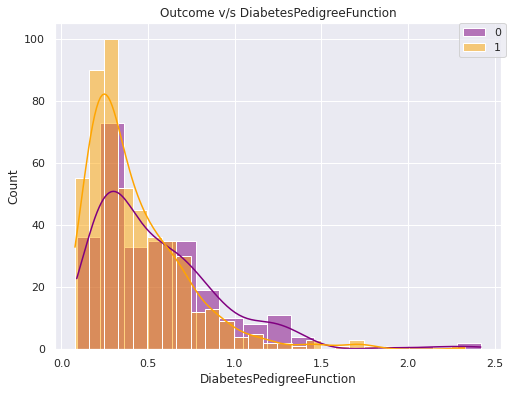

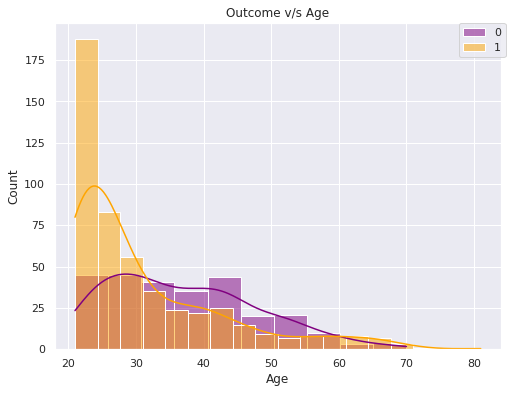

In [762]:
for k in columns:
  list_1 = []
  list_0 = []
  for i in range(df1.shape[0]):
    if (df1['Outcome'][i]==1):
      list_1.append(df1[k][i])
    elif(df1['Outcome'][i]==0):
      list_0.append(df1[k][i])
  plt.figure(figsize=(8,6))
  sns.histplot(data=list_1, color='purple', label="0", kde=True).set(xlabel=k, ylabel='Count')
  sns.histplot(data=list_0, color='orange', alpha=0.5, label="1", kde=True).set(xlabel=k, ylabel='Count')
  plt.title("Outcome v/s " +k)
  plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
  plt.show()

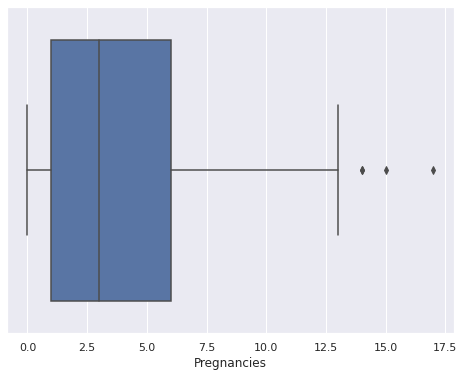

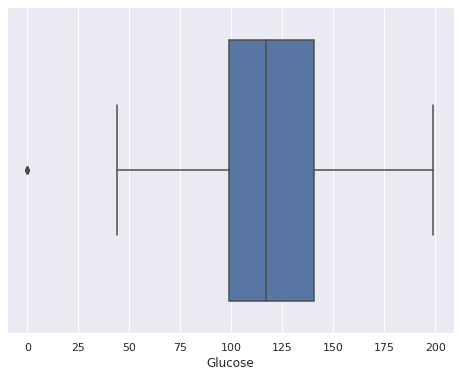

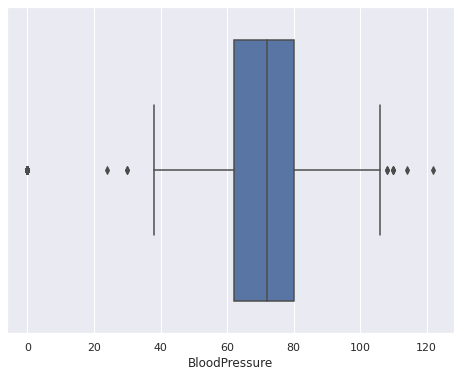

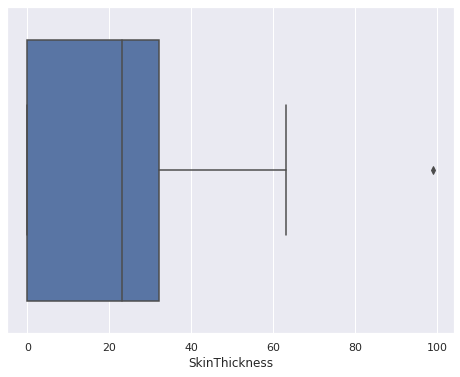

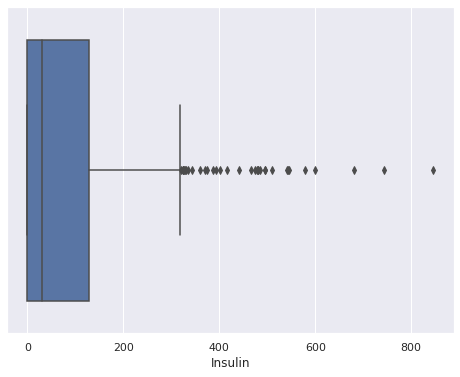

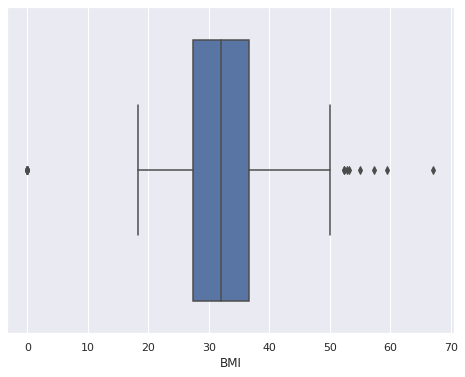

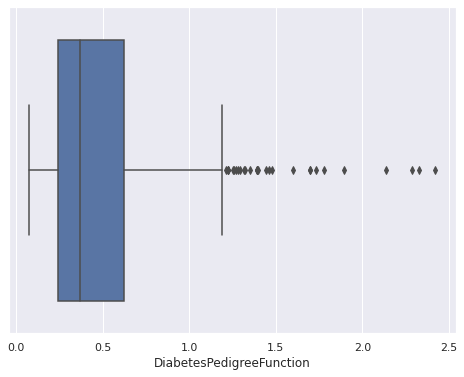

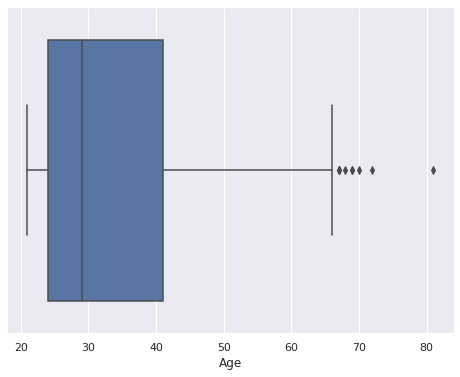

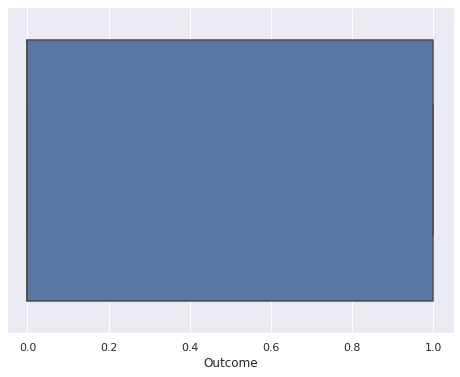

In [763]:
for i in df1.select_dtypes(np.number).columns:
    sns.boxplot(x=df1[i])
    plt.show()

In [764]:
df1.drop(df1[df1["Pregnancies"] > 15].index,inplace=True)
df1.drop(df1[df1["Glucose"] < 25].index,inplace=True)
df1.drop(df1[df1["BloodPressure"] >120].index,inplace=True)
df1.drop(df1[df1["BloodPressure"] < 20].index,inplace=True)
df1.drop(df1[df1["SkinThickness"] > 80].index,inplace=True)
df1.drop(df1[df1["Insulin"] > 600].index,inplace=True)
df1.drop(df1[df1["BMI"] > 60].index,inplace=True)
df1.drop(df1[df1["BMI"] < 10].index,inplace=True)
df1.drop(df1[df1["DiabetesPedigreeFunction"] > 2].index,inplace=True)
df1.drop(df1[df1["Age"] > 75].index,inplace=True)

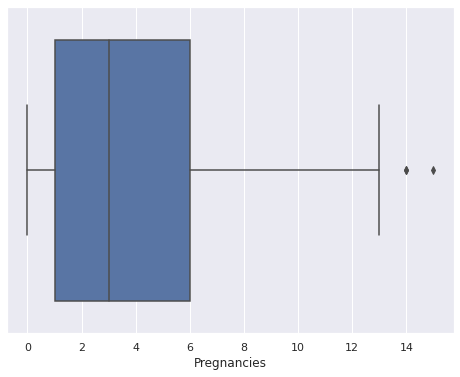

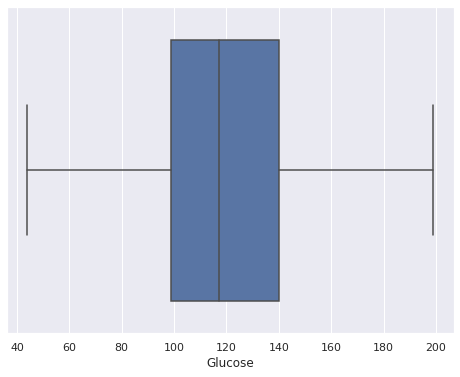

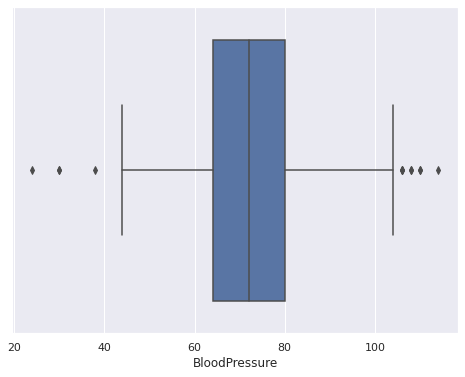

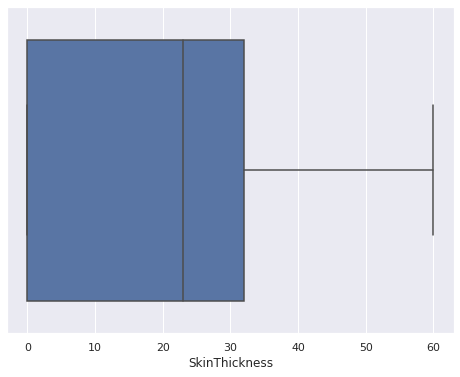

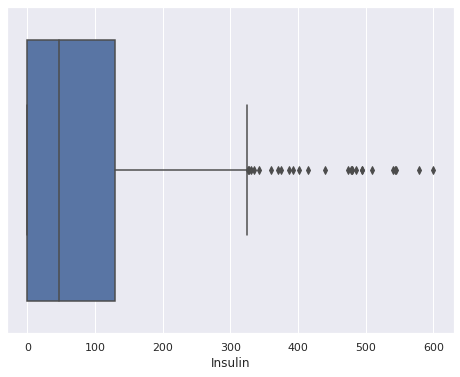

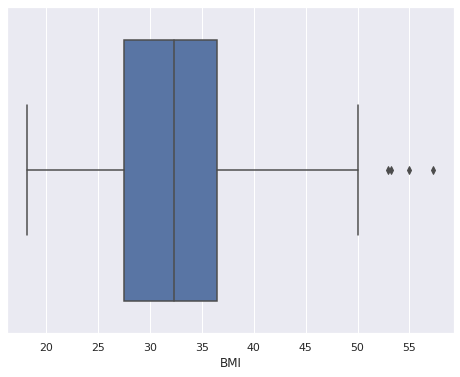

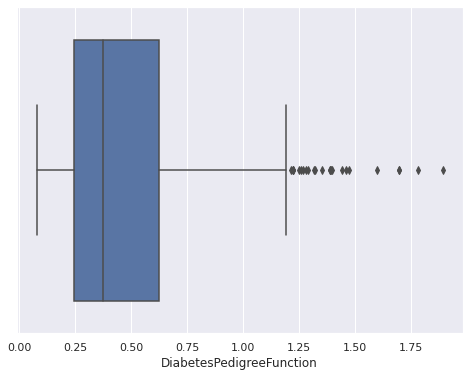

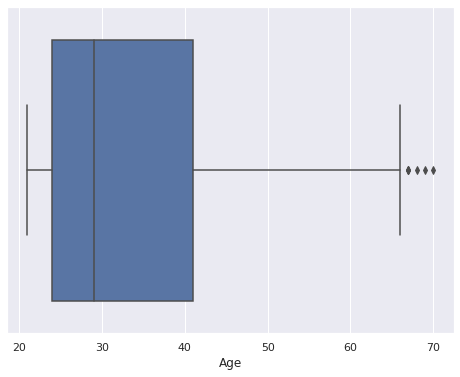

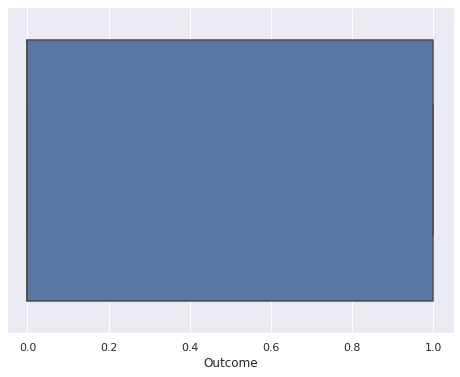

In [765]:
for i in df1.select_dtypes(np.number).columns:
    sns.boxplot(x=df1[i])
    plt.show()

In [766]:
df1.shape

(713, 9)

In [767]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000
mean,3.873773,121.294530,72.300140,21.129032,81.280505,32.335484,0.464731,33.249649,0.339411
std,3.330283,30.376156,12.159738,15.371437,108.284399,6.660814,0.305076,11.599082,0.473842
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,46.000000,32.300000,0.375000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,130.000000,36.500000,0.624000,41.000000,1.000000
max,15.000000,199.000000,114.000000,60.000000,600.000000,57.300000,1.893000,70.000000,1.000000


                          Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.142412  ...  0.563986  0.232785
Glucose                      0.142412  1.000000  ...  0.260356  0.486792
BloodPressure                0.226445  0.237831  ...  0.352579  0.177546
SkinThickness               -0.096394  0.037557  ... -0.154199  0.071110
Insulin                     -0.071930  0.314985  ... -0.062209  0.150089
BMI                          0.029080  0.209329  ...  0.037996  0.291124
DiabetesPedigreeFunction    -0.015529  0.094038  ...  0.036309  0.174109
Age                          0.563986  0.260356  ...  1.000000  0.249048
Outcome                      0.232785  0.486792  ...  0.249048  1.000000

[9 rows x 9 columns]


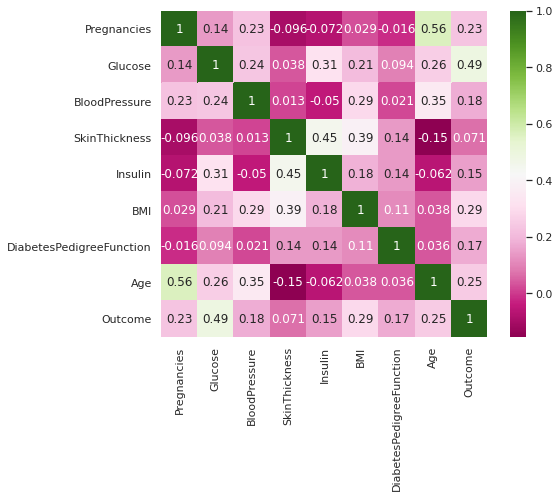

In [768]:
plt.rcParams['figure.figsize'] = [8,6]
corrMatrix = df1.corr()
print (corrMatrix)
sns.heatmap(corrMatrix, annot=True, cmap='PiYG',square=True)
plt.show()

In [769]:
Y = df1['Outcome']
X = df1.drop('Outcome', axis = 1)
cols=X.columns

In [770]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
Z=X
scaler = StandardScaler().fit_transform(X)
# print("Standardized dataset \n",scaler)
scaler_df = pd.DataFrame(scaler, columns = cols)
print(scaler_df)
# print(X)

     Pregnancies   Glucose  ...  DiabetesPedigreeFunction       Age
0       0.638901  0.879776  ...                  0.532271  1.445124
1      -0.863527 -1.195675  ...                 -0.373056 -0.194087
2       1.239872  2.032804  ...                  0.679878 -0.107813
3      -0.863527 -1.063900  ...                 -0.976607 -1.056829
4       0.338415 -0.174421  ...                 -0.865081 -0.280361
..           ...       ...  ...                       ...       ...
708     1.840843 -0.668576  ...                 -0.963486  2.566689
709    -0.563042  0.023241  ...                 -0.409138 -0.539184
710     0.338415 -0.009703  ...                 -0.720754 -0.280361
711    -0.863527  0.155015  ...                 -0.379616  1.186301
712    -0.863527 -0.932126  ...                 -0.491142 -0.884281

[713 rows x 8 columns]


In [771]:
#Splitting the data into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaler_df, Y, test_size = 0.2, random_state = 42)

In [772]:
accuracies=[]
forward_accuracies=[]
kbest_accuracies=[]
f1=[]
forward_f1=[]
kbest_f1=[]


In [773]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score
x=LogisticRegression().fit(X_train, Y_train)
y_pred = x.predict(X_test)
accuracies.append(x.score(X_test, Y_test))
f1.append(f1_score(Y_test, x.predict(X_test)))
print('Accuracy of logistic regression classifier: ',x.score(X_test, Y_test))
print('f1 score of logistic regression classifier: ',f1_score(Y_test, x.predict(X_test)))

Accuracy of logistic regression classifier:  0.7832167832167832
f1 score of logistic regression classifier:  0.6436781609195402


In [774]:
from sklearn.ensemble import RandomForestClassifier
x=RandomForestClassifier().fit(X_train, Y_train)
y_pred = x.predict(X_test)
accuracies.append(x.score(X_test, Y_test))
f1.append(f1_score(Y_test, x.predict(X_test)))
print('Accuracy of Random Forest Classifier : ',x.score(X_test, Y_test))
print('f1 score of Random Forest Classifier : ',f1_score(Y_test, x.predict(X_test)))

Accuracy of Random Forest Classifier :  0.7412587412587412
f1 score of Random Forest Classifier :  0.5747126436781609


In [775]:
from sklearn.neural_network import MLPClassifier
x=MLPClassifier().fit(X_train, Y_train)
y_pred = x.predict(X_test)
accuracies.append(x.score(X_test, Y_test))
f1.append(f1_score(Y_test, x.predict(X_test)))
print('Accuracy of MLP classifier: ',x.score(X_test, Y_test))
print('f1 score of MLP classifier: ',f1_score(Y_test, x.predict(X_test)))

Accuracy of MLP classifier:  0.7762237762237763
f1 score of MLP classifier:  0.6595744680851063


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [776]:
from sklearn.naive_bayes import GaussianNB
x=GaussianNB().fit(X, Y)
y_pred = (x.predict(X_test))
accuracies.append(x.score(X_test, Y_test))
f1.append(f1_score(Y_test, x.predict(X_test)))
print('Accuracy of Gaussian Naive Bayes Classifier : ', x.score(X_test, Y_test))
print('f1 score of Gaussian Naive Bayes Classifier : ', f1_score(Y_test, x.predict(X_test)))

Accuracy of Gaussian Naive Bayes Classifier :  0.6503496503496503
f1 score of Gaussian Naive Bayes Classifier :  0.07407407407407407


In [777]:
# from keras.models import Sequential
# from keras.layers import Dense
# import numpy as np

# model = Sequential()
# model.add(Dense(16, input_dim = 8, activation = 'relu'))
# model.add(Dense(8, activation = 'relu'))
# model.add(Dense(4, activation = 'relu'))
# model.add(Dense(1,activation="sigmoid"))
# #compile model
# model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
 
# # train model
# model.fit(x =X_train , y = Y_train, epochs = 200, batch_size = 10)
 
# # evaluate model
# scores = model.evaluate(x = X_test, y = Y_test)
 
# print('\n%s : %.2f%%' % (model.metrics_names[1], scores[1] * 100))

Using feature selection


Forward feature

In [778]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
LR = LogisticRegression()
# SFS= SequentialFeatureSelector(n_features_to_select=3)
model = SFS(LR, k_features='best', forward=True, n_jobs=-1)
model.fit(X,Y)
print(model.k_feature_names_)

('Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction')


In [779]:
X_train=X_train.to_numpy()

In [780]:

B = X_train[:, [1,5,0,6]]
B_test = X_test.drop(['Age', 'BloodPressure', 'SkinThickness','Insulin'], axis=1)
B_test

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction
120,1.540357,0.023241,0.144906,2.129713
329,-0.863527,2.461072,0.625665,1.345753
39,0.939386,1.242156,-0.741493,-0.560026
294,-0.262556,-0.207365,0.866045,-1.032370
653,1.540357,1.406875,0.069788,-1.038930
...,...,...,...,...
654,-0.563042,-0.932126,0.851021,0.686439
132,1.840843,-0.437971,0.009693,-0.632189
291,-0.563042,-0.306196,0.265096,-0.491142
41,-0.863527,0.813889,-0.395948,0.325620


In [781]:
LR.fit(B, Y_train)
y_pred = LR.predict(B_test)
forward_accuracies.append(LR.score(B_test, Y_test))
forward_f1.append(f1_score(Y_test, LR.predict(B_test)))
print('Accuracy of logistic regression classifier on test set: ',LR.score(B_test, Y_test))
print('f1 score of logistic regression classifier on test set: ',f1_score(Y_test, LR.predict(B_test)))

Accuracy of logistic regression classifier on test set:  0.7762237762237763
f1 score of logistic regression classifier on test set:  0.6444444444444445


In [782]:
RF = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features = 'sqrt')
model = SFS(RF, k_features='best', forward=True, n_jobs=-1)
model.fit(X,Y)
print(model.k_feature_names_)



('Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age')


In [783]:
D = X_train[:, [0,1,2,5,7,6]]
D_test = X_test.drop(['SkinThickness','Insulin'], axis=1)
D_test



,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
120,1.540357,0.023241,-1.341442,0.144906,2.129713,-0.021538
329,-0.863527,2.461072,0.304485,0.625665,1.345753,-0.366635
39,0.939386,1.242156,-0.683071,-0.741493,-0.560026,0.582381
294,-0.262556,-0.207365,-0.518479,0.866045,-1.032370,-0.452910
653,1.540357,1.406875,0.469078,0.069788,-1.038930,1.013753
...,...,...,...,...,...,...
654,-0.563042,-0.932126,-0.683071,0.851021,0.686439,-0.884281
132,1.840843,-0.437971,-0.518479,0.009693,-0.632189,0.754930
291,-0.563042,-0.306196,-0.353886,0.265096,-0.491142,-0.625458
41,-0.863527,0.813889,-1.341442,-0.395948,0.325620,-0.366635


In [784]:
RF.fit(D, Y_train)
y_pred = RF.predict(D_test)
forward_accuracies.append(RF.score(D_test, Y_test))
forward_f1.append(f1_score(Y_test, RF.predict(D_test)))
print('Accuracy of Random Forest Classifier on test set: ',RF.score(D_test, Y_test))
print('f1 score of Random Forest Classifier on test set: ',f1_score(Y_test, RF.predict(D_test)))

Accuracy of Random Forest Classifier on test set:  0.7552447552447552
f1 score of Random Forest Classifier on test set:  0.6391752577319587


In [785]:
mlp = MLPClassifier(max_iter=1700)
model = SFS(mlp, k_features='best', forward=True, n_jobs=-1)
model.fit(X,Y)
print(model.k_feature_names_)


('Pregnancies', 'Glucose', 'DiabetesPedigreeFunction')


In [786]:
E = X_train[:, [0,2]]
E_test = X_test.drop(['BloodPressure',	'BMI'	,'DiabetesPedigreeFunction','Age','Insulin','SkinThickness'], axis=1)
mlp.fit(E, Y_train)
y_pred = mlp.predict(E_test)
forward_accuracies.append(mlp.score(E_test, Y_test))
forward_f1.append(f1_score(Y_test, mlp.predict(E_test)))
print('Accuracy of MLP on test set: ',mlp.score(E_test, Y_test))
print('f1 score of MLP on test set: ',f1_score(Y_test, mlp.predict(E_test)))

Accuracy of MLP on test set:  0.7132867132867133
f1 score of MLP on test set:  0.4533333333333333


In [787]:
MNB = GaussianNB()
model = SFS(MNB, k_features='best', forward=True, n_jobs=-1)
model.fit(X,Y)
print(model.k_feature_names_)



('Glucose', 'SkinThickness', 'BMI', 'Age')


In [788]:
F = X_train[:, [1,6,5,7]]
F_test = X_test.drop(['Pregnancies', 'Insulin', 'BloodPressure','DiabetesPedigreeFunction'], axis=1)
MNB.fit(F, Y_train)
y_pred = MNB.predict(F_test)
forward_accuracies.append(MNB.score(F_test, Y_test))
forward_f1.append(f1_score(Y_test, MNB.predict(F_test)))
print('Accuracy of GaussianNB on test set: ',MNB.score(F_test, Y_test))
print('f1 score of GaussianNB on test set: ',f1_score(Y_test, MNB.predict(F_test)))

Accuracy of GaussianNB on test set:  0.7552447552447552
f1 score of GaussianNB on test set:  0.6153846153846154


KBest Feature Selection

In [789]:
from sklearn.feature_selection import SelectKBest, f_classif
bf = SelectKBest(score_func=f_classif , k=8)
model = bf.fit(X_train, Y_train)
dfscores = pd.DataFrame(model.scores_)
dfcolumns = pd.DataFrame(columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(8,'Score'))

                      Specs       Score
1                   Glucose  171.382526
5                       BMI   57.765580
7                       Age   35.370528
0               Pregnancies   31.255054
2             BloodPressure   24.163986
4                   Insulin   15.951662
6  DiabetesPedigreeFunction   13.740148
3             SkinThickness    4.930248


In [790]:
A = X_train[:, [1,5,3,0,7]]
A_test = X_test.drop(['SkinThickness','DiabetesPedigreeFunction', 'Insulin'], axis=1)
A_test

,Pregnancies,Glucose,BloodPressure,BMI,Age
120,1.540357,0.023241,-1.341442,0.144906,-0.021538
329,-0.863527,2.461072,0.304485,0.625665,-0.366635
39,0.939386,1.242156,-0.683071,-0.741493,0.582381
294,-0.262556,-0.207365,-0.518479,0.866045,-0.452910
653,1.540357,1.406875,0.469078,0.069788,1.013753
...,...,...,...,...,...
654,-0.563042,-0.932126,-0.683071,0.851021,-0.884281
132,1.840843,-0.437971,-0.518479,0.009693,0.754930
291,-0.563042,-0.306196,-0.353886,0.265096,-0.625458
41,-0.863527,0.813889,-1.341442,-0.395948,-0.366635


In [791]:
LR = LogisticRegression()
LR.fit(A, Y_train)
y_pred = LR.predict(A_test)
kbest_accuracies.append(LR.score(A_test, Y_test))
kbest_f1.append(f1_score(Y_test, LR.predict(A_test)))
print('Accuracy of logistic regression classifier on test set: ',LR.score(A_test, Y_test))
print('f1 score of logistic regression classifier on test set: ',f1_score(Y_test, LR.predict(A_test)))

Accuracy of logistic regression classifier on test set:  0.7412587412587412
f1 score of logistic regression classifier on test set:  0.6021505376344086


In [792]:
rf = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features = 'sqrt')
rf.fit(A, Y_train)
y_pred = rf.predict(A_test)
kbest_accuracies.append(rf.score(A_test, Y_test))
kbest_f1.append(f1_score(Y_test, rf.predict(A_test)))
print('Accuracy of Random Forest on test set: ',rf.score(A_test, Y_test))
print('f1 score of Random Forest on test set: ',f1_score(Y_test, rf.predict(A_test)))

Accuracy of Random Forest on test set:  0.7062937062937062
f1 score of Random Forest on test set:  0.5434782608695652


In [793]:
mlp = MLPClassifier(max_iter=1700)
mlp.fit(A, Y_train)
y_pred = mlp.predict(A_test)
kbest_accuracies.append(mlp.score(A_test, Y_test))
kbest_f1.append(f1_score(Y_test, mlp.predict(A_test)))
print('Accuracy of MLP on test set: ',mlp.score(A_test, Y_test))
print('f1 score of MLP on test set: ',f1_score(Y_test, mlp.predict(A_test)))

Accuracy of MLP on test set:  0.6853146853146853
f1 score of MLP on test set:  0.5454545454545455


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [794]:
gnb = GaussianNB()
gnb.fit(A, Y_train)
y_pred =gnb.predict(A_test)
kbest_accuracies.append(gnb.score(A_test, Y_test))
kbest_f1.append(f1_score(Y_test, gnb.predict(A_test)))
print('Accuracy of Gaussian Classifier on test set: ',gnb.score(A_test, Y_test))
print('f1 score of Gaussian Classifier on test set: ',f1_score(Y_test, gnb.predict(A_test)))

Accuracy of Gaussian Classifier on test set:  0.7342657342657343
f1 score of Gaussian Classifier on test set:  0.6041666666666666


In [795]:
models = ['LogisticRegression','RandomForest','MLPClassifier','Gaussian Naive Bayes']

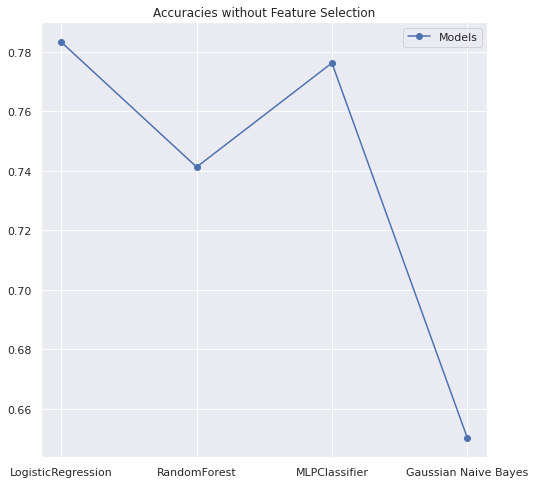

In [796]:
plt.figure(figsize = (8,8))
# ax = plt.subplot(121)
plt.plot(models,accuracies,marker='o')
plt.legend(labels = ['Models','Accuracy'])
plt.title('Accuracies without Feature Selection')
plt.show()


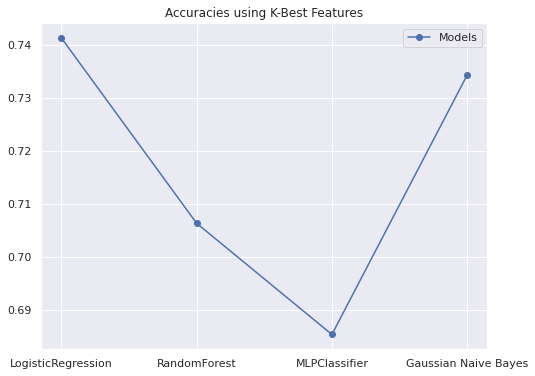

In [797]:

# bx = plt.subplot(122)
plt.plot(models,kbest_accuracies,marker='o')
plt.legend(labels = ['Models','Accuracy'])
plt.title('Accuracies using K-Best Features')
plt.show()


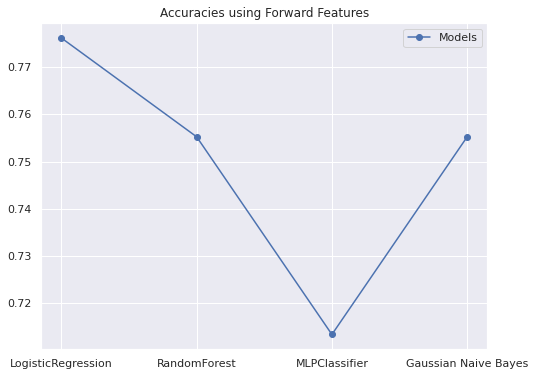

In [798]:

# cx = plt.subplot(123)
plt.plot(models,forward_accuracies,marker='o')
plt.legend(labels = ['Models','Accuracy'])
plt.title('Accuracies using Forward Features')
plt.show()

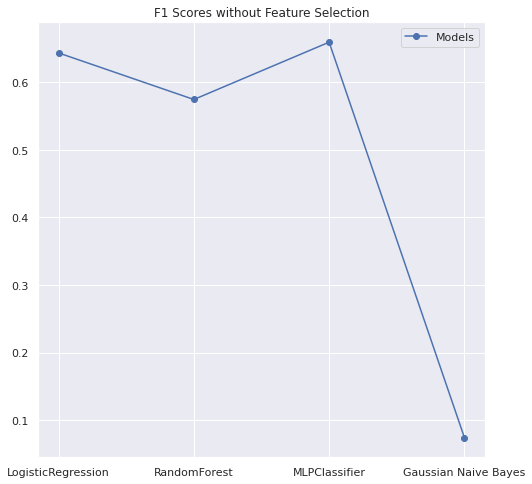

In [799]:
plt.figure(figsize = (8,8))
# bx = plt.subplot(122)
plt.plot(models,f1,marker='o')
plt.legend(labels = ['Models','F1_Score'])
plt.title('F1 Scores without Feature Selection')
plt.show()



Text(0.5, 1.0, 'F1 Scores with Forward Feature Selection')

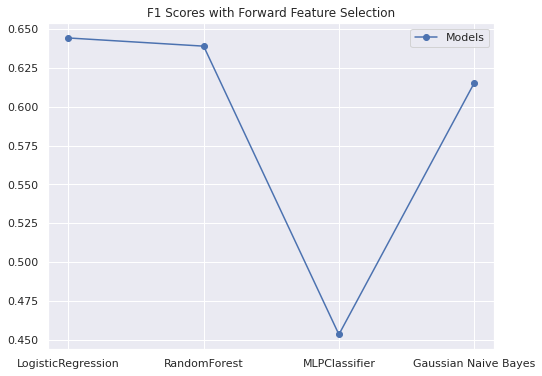

In [800]:

# ax = plt.subplot(121)
plt.plot(models,forward_f1,marker='o')
plt.legend(labels = ['Models','F1_Score'])
plt.title('F1 Scores with Forward Feature Selection')

Text(0.5, 1.0, 'F1 Scores with Kbest Feature Selection')

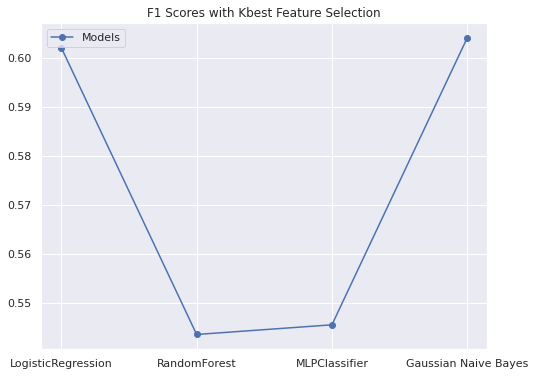

In [801]:

# ax = plt.subplot(121)
plt.plot(models,kbest_f1,marker='o')
plt.legend(labels = ['Models','F1_Score'])
plt.title('F1 Scores with Kbest Feature Selection')

                          Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.142412  ...  0.563986  0.232785
Glucose                      0.142412  1.000000  ...  0.260356  0.486792
BloodPressure                0.226445  0.237831  ...  0.352579  0.177546
SkinThickness               -0.096394  0.037557  ... -0.154199  0.071110
Insulin                     -0.071930  0.314985  ... -0.062209  0.150089
BMI                          0.029080  0.209329  ...  0.037996  0.291124
DiabetesPedigreeFunction    -0.015529  0.094038  ...  0.036309  0.174109
Age                          0.563986  0.260356  ...  1.000000  0.249048
Outcome                      0.232785  0.486792  ...  0.249048  1.000000

[9 rows x 9 columns]


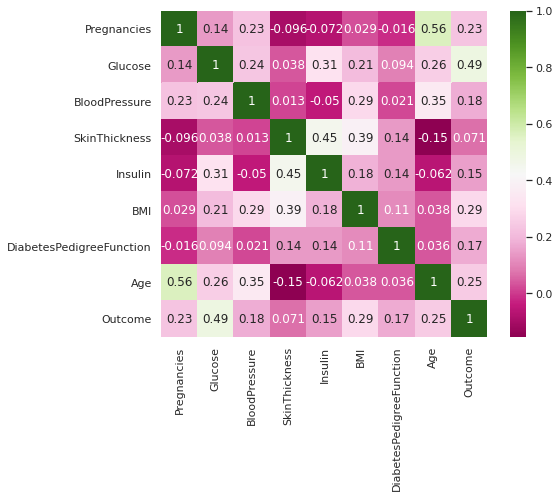

In [802]:
plt.rcParams['figure.figsize'] = [8,6]
corrMatrix = df1.corr()
print (corrMatrix)
sns.heatmap(corrMatrix, annot=True, cmap='PiYG',square=True)
plt.show()